In [184]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [185]:
! pip install koreanize_matplotlib
import koreanize_matplotlib

In [186]:
customer_df= pd.read_csv('./Customer_data.csv')
expert_df= pd.read_csv('./Expert_Data.csv')
log_df= pd.read_csv('./Log_Data02.csv')
service_df= pd.read_csv('./Service_Data.csv')

In [187]:
expert_df.head()

,판매자ID,판매자,판매 서비스 수,총 판매 금액,프리미엄 서비스 가입여부,신속 알람 서비스 사용여부
0,V2_0,김러그,326,147927420,가입,미사용
1,V2_1,디프라이,43,146832200,가입,미사용
2,V2_2,Sailorkr,14,140029000,가입,미사용
3,V2_3,신뢰할만한지식인65,16,130713200,가입,미사용
4,V2_4,에픽핫,18,126229400,가입,미사용


In [188]:
log_df.head()

,거래일자,수수료율,고객ID,프로그램수정횟수,추가결제금액,거래취소여부,거래취소일자,서비스명,판매자,판매금액,서비스가격,평점,이용자수,대분류,서비스번호
0,20210201,6.5,5030100140,0.0,9800,NaN,NaN,"카페24,고도몰,메이크샵등 쇼핑몰 수정,코딩,유지보수",logf1,14800.0,5000.0,5.0,584.0,커머스,2102.0
1,20210201,6.5,8020105385,0.0,0,NaN,NaN,"카페24,고도몰,메이크샵등 쇼핑몰 수정,코딩,유지보수",logf1,5000.0,5000.0,5.0,584.0,커머스,2102.0
2,20210201,6.5,110104033157,0.0,9200,NaN,NaN,"엑셀 VBA, 매크로, ERP 프로그램 개발해 드립니다.",엑셀의신,19200.0,10000.0,5.0,583.0,데이터,2103.0
3,20210201,7.5,40203001176,0.0,11000,NaN,NaN,"엑셀을 이용 서식과 집계, 분석 및 VBA 프로그래밍",태구리,61000.0,50000.0,5.0,504.0,데이터,2105.0
4,20210201,6.5,5041700297,0.0,0,NaN,NaN,"엑셀을 이용 서식과 집계, 분석 및 VBA 프로그래밍",태구리,50000.0,50000.0,5.0,504.0,데이터,2105.0


In [189]:
log_df['거래취소여부']=log_df['거래취소여부'].fillna(0)
log_df['거래취소일자']=log_df['거래취소일자'].fillna(0)


In [190]:
log_df.dropna(inplace=True)

In [191]:
log_df['new_date']=log_df['거래일자'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))

In [192]:
# 판매자를 기준으로 최근 거래일자 도출하고, 판매자를 기준으로 expert_df에 파생변수로 생성

filter_df=log_df.groupby('판매자')['new_date'].max().reset_index()
filter_df.columns=['판매자','최근거래일자']
expert_df=pd.merge(expert_df,filter_df,on='판매자',how='left')
expert_df.head()

,판매자ID,판매자,판매 서비스 수,총 판매 금액,프리미엄 서비스 가입여부,신속 알람 서비스 사용여부,최근거래일자
0,V2_0,김러그,326,147927420,가입,미사용,2021-06-24
1,V2_1,디프라이,43,146832200,가입,미사용,2021-06-04
2,V2_2,Sailorkr,14,140029000,가입,미사용,2021-05-22
3,V2_3,신뢰할만한지식인65,16,130713200,가입,미사용,2021-03-20
4,V2_4,에픽핫,18,126229400,가입,미사용,2021-05-25


In [193]:
expert_df.head()

,판매자ID,판매자,판매 서비스 수,총 판매 금액,프리미엄 서비스 가입여부,신속 알람 서비스 사용여부,최근거래일자
0,V2_0,김러그,326,147927420,가입,미사용,2021-06-24
1,V2_1,디프라이,43,146832200,가입,미사용,2021-06-04
2,V2_2,Sailorkr,14,140029000,가입,미사용,2021-05-22
3,V2_3,신뢰할만한지식인65,16,130713200,가입,미사용,2021-03-20
4,V2_4,에픽핫,18,126229400,가입,미사용,2021-05-25


In [194]:
# 판매자를 기준으로 최근 거래일자 도출하고, 판매자를 기준으로 expert_df에 파생변수로 생성

filter_df=log_df.groupby('판매자')['new_date'].max().reset_index()
filter_df.columns=['판매자','최근거래일자']
expert_df=pd.merge(expert_df,filter_df,on='판매자',how='left')
expert_df.head()

,판매자ID,판매자,판매 서비스 수,총 판매 금액,프리미엄 서비스 가입여부,신속 알람 서비스 사용여부,최근거래일자_x,최근거래일자_y
0,V2_0,김러그,326,147927420,가입,미사용,2021-06-24,2021-06-24
1,V2_1,디프라이,43,146832200,가입,미사용,2021-06-04,2021-06-04
2,V2_2,Sailorkr,14,140029000,가입,미사용,2021-05-22,2021-05-22
3,V2_3,신뢰할만한지식인65,16,130713200,가입,미사용,2021-03-20,2021-03-20
4,V2_4,에픽핫,18,126229400,가입,미사용,2021-05-25,2021-05-25


In [195]:
filter_df2=log_df.groupby('판매자')['이용자수'].sum().reset_index()
filter_df2.columns=['판매자','총이용자수']
expert_df=pd.merge(expert_df,filter_df2, on='판매자', how='left')
expert_df.head()

,판매자ID,판매자,판매 서비스 수,총 판매 금액,프리미엄 서비스 가입여부,신속 알람 서비스 사용여부,최근거래일자_x,최근거래일자_y,총이용자수
0,V2_0,김러그,326,147927420,가입,미사용,2021-06-24,2021-06-24,1304.0
1,V2_1,디프라이,43,146832200,가입,미사용,2021-06-04,2021-06-04,0.0
2,V2_2,Sailorkr,14,140029000,가입,미사용,2021-05-22,2021-05-22,0.0
3,V2_3,신뢰할만한지식인65,16,130713200,가입,미사용,2021-03-20,2021-03-20,0.0
4,V2_4,에픽핫,18,126229400,가입,미사용,2021-05-25,2021-05-25,36.0


In [196]:
# 2021-07-01 기준으로 R 컬럼 생성
log_df['R']=pd.to_datetime('2021-07-01')-pd.to_datetime(log_df['new_date'])
log_df['R']=log_df['R'].dt.days

In [197]:
# log_df에서 판매자별 unique한 R값 도출

filter_df=log_df.groupby('판매자')['R'].unique().reset_index()
filter_df.head()

,판매자,R
0,0to1,"[135, 131, 124, 75]"
1,100ME,"[149, 147, 141, 140, 138, 136, 135, 130, 128, ..."
2,10xDeveloper,"[147, 144, 136, 127, 178, 176, 173, 171, 165, ..."
3,10년차웹개발자,"[150, 148, 141, 132, 130, 128, 124, 178, 175, ..."
4,123abc,[37]


In [198]:
# filter_df에서 가장 낮은 값만 남기기

filter_df['R']=filter_df['R'].apply(lambda x:x[0])
filter_df.head()

,판매자,R
0,0to1,135
1,100ME,149
2,10xDeveloper,147
3,10년차웹개발자,150
4,123abc,37


In [199]:
expert_df=pd.merge(expert_df,filter_df,on='판매자',how='left')
expert_df.head()

,판매자ID,판매자,판매 서비스 수,총 판매 금액,프리미엄 서비스 가입여부,신속 알람 서비스 사용여부,최근거래일자_x,최근거래일자_y,총이용자수,R
0,V2_0,김러그,326,147927420,가입,미사용,2021-06-24,2021-06-24,1304.0,142
1,V2_1,디프라이,43,146832200,가입,미사용,2021-06-04,2021-06-04,0.0,59
2,V2_2,Sailorkr,14,140029000,가입,미사용,2021-05-22,2021-05-22,0.0,86
3,V2_3,신뢰할만한지식인65,16,130713200,가입,미사용,2021-03-20,2021-03-20,0.0,103
4,V2_4,에픽핫,18,126229400,가입,미사용,2021-05-25,2021-05-25,36.0,132


In [200]:
log_df.pivot_table(index='판매자',values='평점', aggfunc=['mean','median']).sample(50)

,mean,median
,평점,평점
판매자,,
피앤비데브,5.000000,5.0
개발전문인스텍,5.000000,5.0
하윤아빠,5.000000,5.0
pmsolu,5.000000,5.0
webking,4.991416,5.0
코라텔,5.000000,5.0
나는판다,5.000000,5.0
나는성윤,5.000000,5.0


In [201]:
filter_df3=log_df.pivot_table(index='판매자', values='평점', aggfunc='mean').reset_index()
filter_df3

,판매자,평점
0,0to1,5.000000
1,100ME,5.000000
2,10xDeveloper,4.941714
3,10년차웹개발자,4.846250
4,123abc,0.000000
...,...,...
2061,효베르,5.000000
2062,효율자동화쟁이,5.000000
2063,흐,3.700000
2064,희몽,5.000000


In [202]:
expert_df=pd.merge(expert_df,filter_df3, on='판매자', how='left')
expert_df.head()

,판매자ID,판매자,판매 서비스 수,총 판매 금액,프리미엄 서비스 가입여부,신속 알람 서비스 사용여부,최근거래일자_x,최근거래일자_y,총이용자수,R,평점
0,V2_0,김러그,326,147927420,가입,미사용,2021-06-24,2021-06-24,1304.0,142,5.0
1,V2_1,디프라이,43,146832200,가입,미사용,2021-06-04,2021-06-04,0.0,59,0.0
2,V2_2,Sailorkr,14,140029000,가입,미사용,2021-05-22,2021-05-22,0.0,86,0.0
3,V2_3,신뢰할만한지식인65,16,130713200,가입,미사용,2021-03-20,2021-03-20,0.0,103,0.0
4,V2_4,에픽핫,18,126229400,가입,미사용,2021-05-25,2021-05-25,36.0,132,5.0


# Clustering

In [207]:
! pip install koreanize_matplotlib
import koreanize_matplotlib

In [209]:
from matplotlib import font_manager, rc

# 한글 폰트 설정 (예: 맑은 고딕)
plt.rcParams['font.family'] = 'Malgun Gothic'

# 폰트 설정 후, 음수 기호가 깨지는 문제 해결
plt.rcParams['axes.unicode_minus'] = False


In [203]:
df=expert_df.copy()

In [204]:
df.head()

,판매자ID,판매자,판매 서비스 수,총 판매 금액,프리미엄 서비스 가입여부,신속 알람 서비스 사용여부,최근거래일자_x,최근거래일자_y,총이용자수,R,평점
0,V2_0,김러그,326,147927420,가입,미사용,2021-06-24,2021-06-24,1304.0,142,5.0
1,V2_1,디프라이,43,146832200,가입,미사용,2021-06-04,2021-06-04,0.0,59,0.0
2,V2_2,Sailorkr,14,140029000,가입,미사용,2021-05-22,2021-05-22,0.0,86,0.0
3,V2_3,신뢰할만한지식인65,16,130713200,가입,미사용,2021-03-20,2021-03-20,0.0,103,0.0
4,V2_4,에픽핫,18,126229400,가입,미사용,2021-05-25,2021-05-25,36.0,132,5.0


In [205]:
df.columns

Index(['판매자ID', '판매자', '판매 서비스 수', '총 판매 금액', '프리미엄 서비스 가입여부',
       '신속 알람 서비스 사용여부', '최근거래일자_x', '최근거래일자_y', '총이용자수', 'R', '평점'],
      dtype='object')

array([[<Axes: title={'center': 'R'}>,
        <Axes: title={'center': '판매 서비스 수'}>],
       [<Axes: title={'center': '총 판매 금액'}>, <Axes: >]], dtype=object)

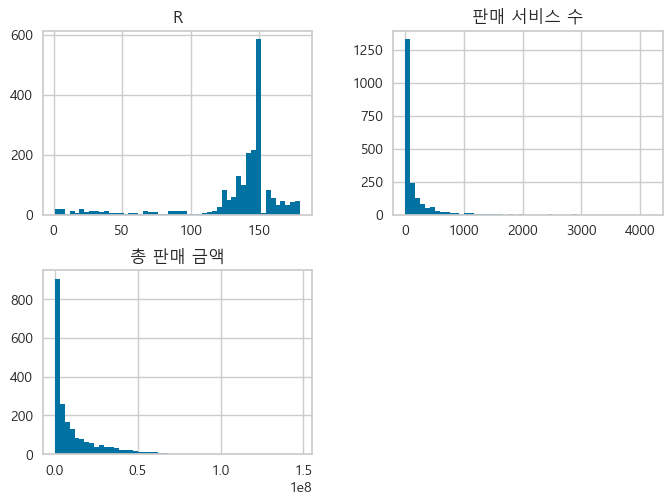

In [210]:
df[['R','판매 서비스 수','총 판매 금액']].hist(bins=50)

In [211]:
df[['R','판매 서비스 수','총 판매 금액']].describe()

,R,판매 서비스 수,총 판매 금액
count,2066.000000,2066.00000,2.066000e+03
mean,134.342207,166.63940,1.116331e+07
std,36.619297,342.30936,1.618498e+07
min,1.000000,1.00000,5.000000e+03
25%,135.000000,9.00000,9.618500e+05
50%,146.000000,36.00000,4.139370e+06
75%,150.000000,158.75000,1.508420e+07
max,180.000000,4180.00000,1.479274e+08


## standard scaler

In [212]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

st_df = scaler.fit_transform(df[['판매 서비스 수', '총 판매 금액']])

# 스케일링된 데이터프레임 생성
st_df = pd.DataFrame(st_df, columns=['판매 서비스 수', '총 판매 금액'])

print(st_df.describe())


           판매 서비스 수       총 판매 금액
count  2.066000e+03  2.066000e+03
mean  -2.751376e-17  1.100550e-16
std    1.000242e+00  1.000242e+00
min   -4.840052e-01 -6.895904e-01
25%   -4.606288e-01 -6.304565e-01
50%   -3.817337e-01 -4.340837e-01
75%   -2.305315e-02  2.423136e-01
max    1.172721e+01  8.452107e+00


In [213]:

st_sc_df = pd.concat([st_df, log_df[['R']]], axis=1)

st_sc_df.head()

,판매 서비스 수,총 판매 금액,R
0,0.465658,8.452107,150
1,-0.361279,8.384422,150
2,-0.446019,7.963980,150
3,-0.440175,7.388258,150
4,-0.434330,7.111156,150


array([[<Axes: title={'center': 'R'}>,
        <Axes: title={'center': '판매 서비스 수'}>],
       [<Axes: title={'center': '총 판매 금액'}>, <Axes: >]], dtype=object)

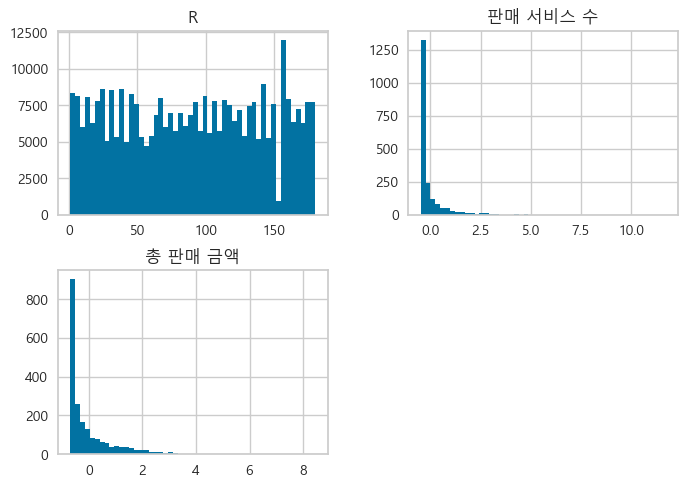

In [214]:
st_sc_df[['R','판매 서비스 수','총 판매 금액']].hist(bins=50)

## MinMax Scaler

In [215]:
from sklearn.preprocessing import MinMaxScaler

# 스케일러 초기화
scaler = MinMaxScaler()

# 데이터를 스케일링
mm_df = scaler.fit_transform(df[['판매 서비스 수', '총 판매 금액']])

# 스케일링된 데이터프레임 생성
mm_df = pd.DataFrame(mm_df, columns=['판매 서비스 수', '총 판매 금액'])

print(mm_df.describe())


          판매 서비스 수      총 판매 금액
count  2066.000000  2066.000000
mean      0.039636     0.075434
std       0.081912     0.109415
min       0.000000     0.000000
25%       0.001914     0.006469
50%       0.008375     0.027950
75%       0.037748     0.101940
max       1.000000     1.000000


In [216]:

mm_sc_df = pd.concat([mm_df, df[['R']]], axis=1)

mm_sc_df.head()

,판매 서비스 수,총 판매 금액,R
0,0.077770,1.000000,142
1,0.010050,0.992596,59
2,0.003111,0.946604,86
3,0.003589,0.883627,103
4,0.004068,0.853315,132


array([[<Axes: title={'center': 'R'}>,
        <Axes: title={'center': '판매 서비스 수'}>],
       [<Axes: title={'center': '총 판매 금액'}>, <Axes: >]], dtype=object)

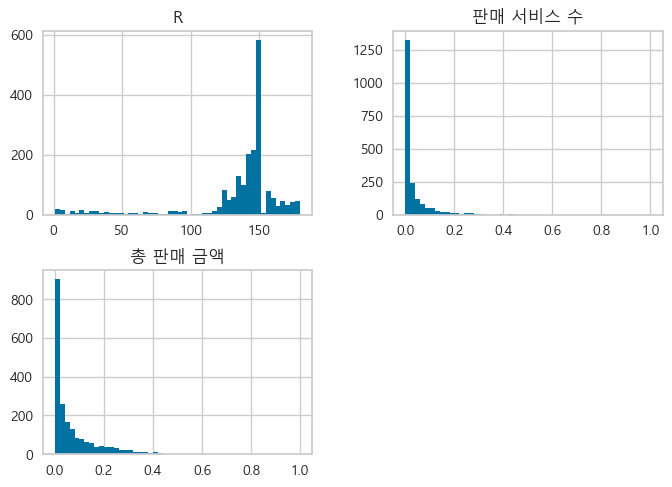

In [217]:
mm_sc_df[['R','판매 서비스 수','총 판매 금액']].hist(bins=50)

## RobustScaler

In [218]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

rob_df = scaler.fit_transform(df[['판매 서비스 수', '총 판매 금액']])

rob_df = pd.DataFrame(rob_df, columns=['판매 서비스 수', '총 판매 금액'])

print(rob_df.describe())


          판매 서비스 수      총 판매 금액
count  2066.000000  2066.000000
mean      0.872383     0.497363
std       2.285872     1.146055
min      -0.233723    -0.292754
25%      -0.180301    -0.224999
50%       0.000000     0.000000
75%       0.819699     0.775001
max      27.672788    10.181595


In [219]:
rob_sc_df = pd.concat([rob_df, df[['R']]], axis=1)

rob_sc_df.head()

,판매 서비스 수,총 판매 금액,R
0,1.936561,10.181595,142
1,0.046745,10.104043,59
2,-0.146912,9.622310,86
3,-0.133556,8.962661,103
4,-0.120200,8.645164,132


array([[<Axes: title={'center': 'R'}>,
        <Axes: title={'center': '판매 서비스 수'}>],
       [<Axes: title={'center': '총 판매 금액'}>, <Axes: >]], dtype=object)

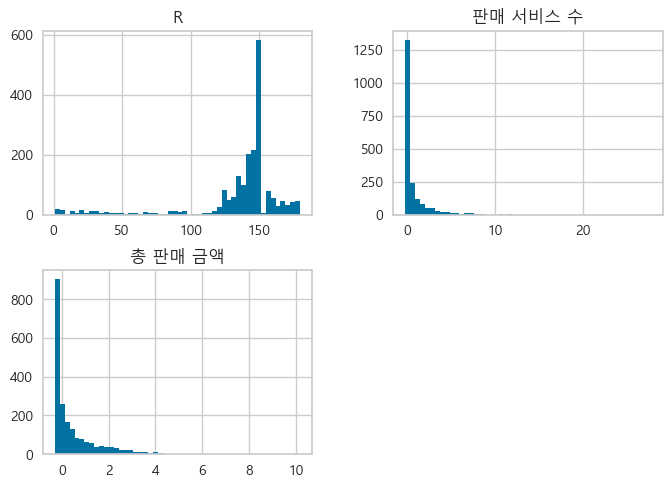

In [220]:
rob_sc_df[['R','판매 서비스 수','총 판매 금액']].hist(bins=50)

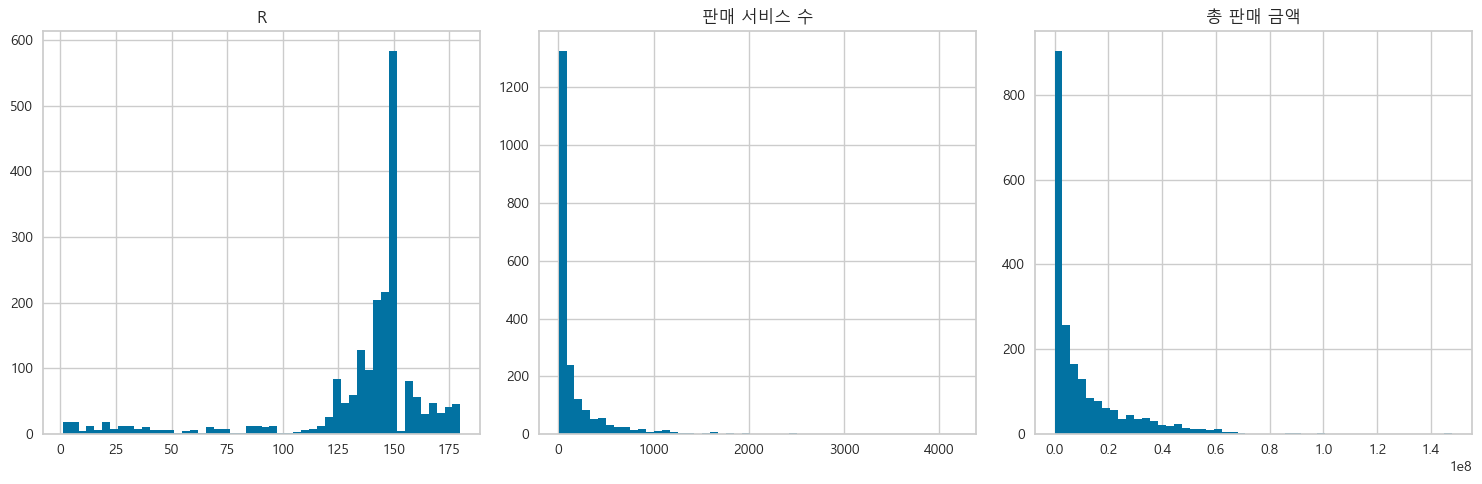

In [221]:

import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(15, 5))

# Create subplots
plt.subplot(1, 3, 1)
df['R'].hist(bins=50)
plt.title('R')

plt.subplot(1, 3, 2)
df['판매 서비스 수'].hist(bins=50)
plt.title('판매 서비스 수')

plt.subplot(1, 3, 3)
df['총 판매 금액'].hist(bins=50)
plt.title('총 판매 금액')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [222]:
ID=df['판매자ID']

In [223]:
df['R_Score'] = pd.qcut(df['R'], 4, labels=[4, 3, 2, 1])
df['F_Score'] = pd.qcut(df['판매 서비스 수'].rank(method='first'), 4, labels=[1, 2, 3, 4])
df['M_Score'] = pd.qcut(df['총 판매 금액'], 4, labels=[1, 2, 3, 4])

# RFM 점수 합산
df['RFM_Score'] = df['R_Score'].astype(int) + df['F_Score'].astype(int) + df['M_Score'].astype(int)

# 클러스터링을 위해 필요 없는 열 제거
rfm_df = df[['R_Score', 'F_Score', 'M_Score', 'RFM_Score']]

In [224]:
rfm_df[['R_Score', 'F_Score', 'M_Score']]

,R_Score,F_Score,M_Score
0,3,4,4
1,4,3,4
2,4,2,4
3,4,2,4
4,4,2,4
...,...,...,...
2061,1,1,1
2062,4,1,1
2063,1,1,1
2064,1,1,1


In [225]:
# standard_scaler

df['R_Score2'] = pd.qcut(st_sc_df['R'], 4, labels=[4, 3, 2, 1])
df['F_Score2'] = pd.qcut(st_sc_df['판매 서비스 수'].rank(method='first'), 4, labels=[1, 2, 3, 4])
df['M_Score2'] = pd.qcut(st_sc_df['총 판매 금액'], 4, labels=[1, 2, 3, 4])

# RFM 점수 합산
df['RFM_Score2'] = df['R_Score2'].astype(int) + df['F_Score2'].astype(int) + df['M_Score2'].astype(int)

# 클러스터링을 위해 필요 없는 열 제거
rfm_df2 = df[['R_Score2', 'F_Score2', 'M_Score2', 'RFM_Score2']]

In [226]:
# minmax_scaler

df['R_Score3'] = pd.qcut(mm_sc_df['R'], 4, labels=[4, 3, 2, 1])
df['F_Score3'] = pd.qcut(mm_sc_df['판매 서비스 수'].rank(method='first'), 4, labels=[1, 2, 3, 4])
df['M_Score3'] = pd.qcut(mm_sc_df['총 판매 금액'], 4, labels=[1, 2, 3, 4])

# RFM 점수 합산
df['RFM_Score3'] = df['R_Score3'].astype(int) + df['F_Score3'].astype(int) + df['M_Score3'].astype(int)

# 클러스터링을 위해 필요 없는 열 제거
rfm_df3 = df[['R_Score3', 'F_Score3', 'M_Score3', 'RFM_Score3']]

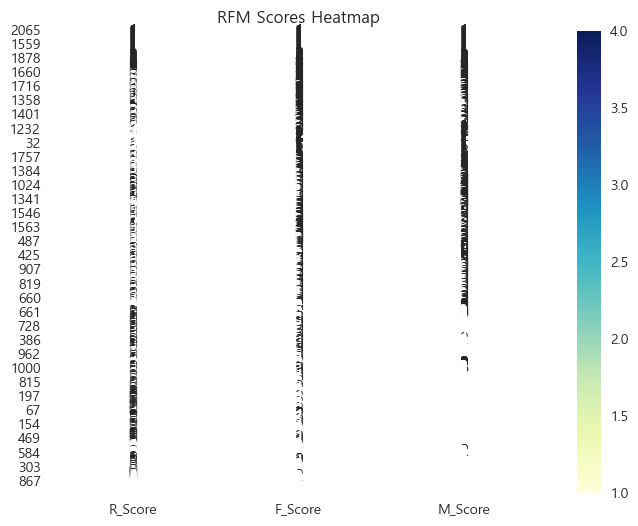

In [227]:
# prompt: rfm_df[[['R_Score', 'F_Score', 'M_Score']]] score어 높을 수록 진한 색깔 표현

import matplotlib.pyplot as plt
import seaborn as sns

# 'RFM_Score'를 기준으로 정렬
rfm_df_sorted = rfm_df.sort_values('RFM_Score')

# 히트맵 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(rfm_df_sorted[['R_Score', 'F_Score', 'M_Score']], cmap='YlGnBu', annot=True, fmt='d', linewidths=.5)
plt.title('RFM Scores Heatmap')
plt.show()


In [228]:
rfm_df.head()

,R_Score,F_Score,M_Score,RFM_Score
0,3,4,4,11
1,4,3,4,11
2,4,2,4,10
3,4,2,4,10
4,4,2,4,10


In [229]:
# ver1. scaling x

X=rfm_df[['R_Score', 'F_Score', 'M_Score']]
X['Weighted_RFM_Score'] = X['R_Score'].astype(int) * 0.2 + X['F_Score'].astype(int) * 0.5 + X['M_Score'].astype(int) * 0.3


In [232]:
# ver2. standard Scaler

X=rfm_df2[['R_Score2', 'F_Score2', 'M_Score2']]
X['Weighted_RFM_Score'] = X['R_Score2'].astype(int) * 0.2 + X['F_Score2'].astype(int) * 0.5 + X['M_Score2'].astype(int) * 0.3


In [231]:
# ver3. standard Scaler

X=rfm_df3[['R_Score3', 'F_Score3', 'M_Score3']]
X['Weighted_RFM_Score'] = X['R_Score3'].astype(int) * 0.2 + X['F_Score3'].astype(int) * 0.4 + X['M_Score3'].astype(int) * 0.4


In [233]:
X=X.astype(int)

In [234]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

kmean=KMeans(n_clusters=8,n_init='auto',random_state=111)
kmean.fit(X)
kmean.cluster_centers_, kmean.inertia_

(array([[1.        , 1.        , 2.        , 1.        ],
        [1.        , 2.525     , 3.        , 2.        ],
        [1.        , 4.        , 3.60455487, 3.        ],
        [1.        , 1.30833333, 1.        , 1.        ],
        [1.        , 3.13076923, 1.85769231, 2.        ],
        [1.        , 2.69756098, 4.        , 2.        ],
        [1.        , 2.        , 2.        , 1.        ],
        [1.        , 1.        , 3.29230769, 1.        ]]),
 405.6450418351535)

In [235]:
! pip install yellowbrick

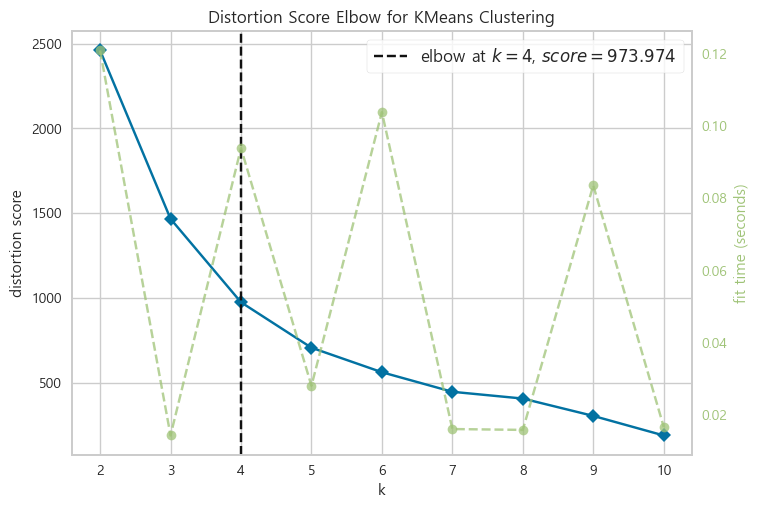

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [236]:
from yellowbrick.cluster import KElbowVisualizer

KEV=KElbowVisualizer(kmean,k=10,n_init='auto')
KEV.fit(X)
KEV.show()

In [237]:

n_cluster=4
k_means=KMeans(n_clusters=n_cluster,n_init='auto',random_state=111)
k_means.fit(X)

KMeans(n_clusters=4, random_state=111)

In [238]:
pd.Series(k_means.labels_).value_counts()

0    819
1    504
2    483
3    260
Name: count, dtype: int64

In [239]:
silhouettes_avg=silhouette_score(X,k_means.labels_)

In [240]:
silhouettes_avg

0.5872037201192601

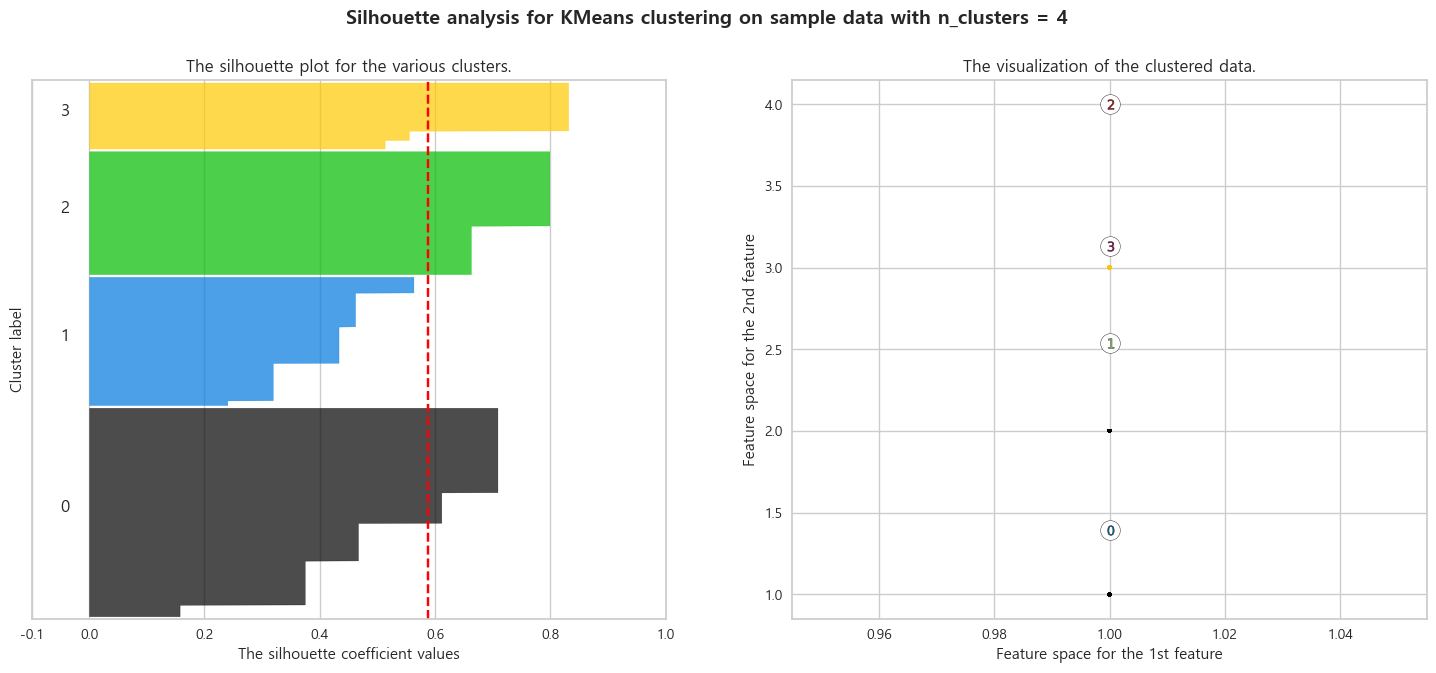

In [241]:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

# Create a subplot with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(X) + (n_cluster + 1) * 10])

cluster_labels = k_means.labels_
sample_silhouette_values = silhouette_samples(X, cluster_labels)

y_lower = 10
for i in range(n_cluster):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_cluster)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouettes_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_cluster)
ax2.scatter(
    X.iloc[:, 0], X.iloc[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
)

# Labeling the clusters
centers = k_means.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(
    centers[:, 0],
    centers[:, 1],
    marker="o",
    c="white",
    alpha=1,
    s=200,
    edgecolor="k",
)

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(
    "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
    % n_cluster,
    fontsize=14,
    fontweight="bold",
)

plt.show()

In [242]:
df['Cluster']=k_means.labels_
df.head()

,판매자ID,판매자,판매 서비스 수,총 판매 금액,프리미엄 서비스 가입여부,신속 알람 서비스 사용여부,최근거래일자_x,최근거래일자_y,총이용자수,R,...,RFM_Score,R_Score2,F_Score2,M_Score2,RFM_Score2,R_Score3,F_Score3,M_Score3,RFM_Score3,Cluster
0,V2_0,김러그,326,147927420,가입,미사용,2021-06-24,2021-06-24,1304.0,142,...,11,1,4,4,9,3,4,4,11,2
1,V2_1,디프라이,43,146832200,가입,미사용,2021-06-04,2021-06-04,0.0,59,...,11,1,3,4,8,4,3,4,11,1
2,V2_2,Sailorkr,14,140029000,가입,미사용,2021-05-22,2021-05-22,0.0,86,...,10,1,2,4,7,4,2,4,10,1
3,V2_3,신뢰할만한지식인65,16,130713200,가입,미사용,2021-03-20,2021-03-20,0.0,103,...,10,1,2,4,7,4,2,4,10,1
4,V2_4,에픽핫,18,126229400,가입,미사용,2021-05-25,2021-05-25,36.0,132,...,10,1,2,4,7,4,2,4,10,1


In [246]:
from scipy import stats

print(stats.normaltest(expert_df['판매 서비스 수']))
print(stats.normaltest(expert_df['총 판매 금액']))
print(stats.normaltest(expert_df['총이용자수']))
print(stats.normaltest(expert_df['평점']))



NormaltestResult(statistic=1941.4506198622366, pvalue=0.0)
NormaltestResult(statistic=1282.9044371262255, pvalue=2.6353668181430544e-279)
NormaltestResult(statistic=3284.136297145376, pvalue=0.0)
NormaltestResult(statistic=593.2415531608508, pvalue=1.51089231866867e-129)


In [247]:
# 모두 비정규성 띠고 있기 때문에 중앙값을 대표값으로 설정

In [248]:
rank_cluster=df.pivot_table(index='Cluster',values=['판매 서비스 수','총이용자수', '총 판매 금액'],aggfunc='median').reset_index()
rank_cluster

,Cluster,총 판매 금액,총이용자수,판매 서비스 수
0,0,676080,7.0,6.0
1,1,13079800,112.0,44.5
2,2,18779610,9405.0,421.0
3,3,1867300,535.0,78.5


In [180]:
df.pivot_table(index='Cluster',values=['평점'],aggfunc='mean')

,평점
Cluster,
0,3.539847
1,4.016851
2,4.891613
3,4.800981


In [146]:
rank_cluster = rank_cluster.sort_values(by='총 판매 금액', ascending=False).reset_index(drop=True)
rank_cluster

,Cluster,총 판매 금액,총이용자수,판매 서비스 수
0,1,21698400,4568.0,303
1,2,10584800,13.5,17
2,3,2945100,502.0,82
3,0,605200,8.0,7


In [150]:
log_df.head(2)

,거래일자,수수료율,고객ID,프로그램수정횟수,추가결제금액,거래취소여부,거래취소일자,서비스명,판매자,판매금액,서비스가격,평점,이용자수,대분류,서비스번호,new_date,R
0,20210201,6.5,5030100140,0.0,9800,0.0,0.0,"카페24,고도몰,메이크샵등 쇼핑몰 수정,코딩,유지보수",logf1,14800.0,5000.0,5.0,584.0,커머스,2102.0,2021-02-01,150
1,20210201,6.5,8020105385,0.0,0,0.0,0.0,"카페24,고도몰,메이크샵등 쇼핑몰 수정,코딩,유지보수",logf1,5000.0,5000.0,5.0,584.0,커머스,2102.0,2021-02-01,150


In [154]:
log_df.groupby(['대분류'])['판매금액'].mean().sort_values(ascending=False)

대분류
UnReal    385743.085554
모바일       181294.928625
기획        109545.213740
인공지능       90217.485836
프로그래밍      83690.821784
프로그램       80285.982861
디자인        77150.309327
게임         69992.828817
홈페이지       59346.211988
기타         46730.544127
데이터        37393.205253
커머스        34153.838893
Name: 판매금액, dtype: float64

In [157]:
df.head(2)

,판매자ID,판매자,판매 서비스 수,총 판매 금액,프리미엄 서비스 가입여부,신속 알람 서비스 사용여부,최근거래일자,총이용자수,R,평점,...,RFM_Score,R_Score2,F_Score2,M_Score2,RFM_Score2,R_Score3,F_Score3,M_Score3,RFM_Score3,Cluster
0,V2_0,김러그,326,147927420,가입,미사용,2021-06-24,1304.0,142,5.0,...,11,1,4,4,9,3,4,4,11,1
1,V2_1,디프라이,43,146832200,가입,미사용,2021-06-04,0.0,59,0.0,...,11,1,3,4,8,4,3,4,11,1


In [158]:
df.groupby('Cluster')['프리미엄 서비스 가입여부'].value_counts()

Cluster  프리미엄 서비스 가입여부
0        미가입              742
         가입                31
1        미가입              421
         가입               205
2        미가입              224
         가입                36
3        미가입              387
         가입                20
Name: count, dtype: int64